## **Chronic_Kidney_Disease**

In [175]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [176]:
#Load dataset
chronic_df = pd.read_csv("C:\\Users\\AbhinavPeddi\\datasets\\kidney_disease.csv")
chronic_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [177]:
# checking info of columns and null values
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## **`Data Cleaning`**

In [178]:
# drop id column
chronic_df = chronic_df.drop('id', axis=1)

In [179]:
# rename column names 
chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [180]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [181]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical
columns_to_convert = ['specific_gravity', 'albumin', 'sugar']
chronic_df[columns_to_convert] = chronic_df[columns_to_convert].astype('object')

In [182]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'], errors='coerce')
chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'], errors='coerce')
chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'], errors='coerce')

In [183]:
# Extracting categorical and numerical column names
cat_cols = [col for col in chronic_df.columns if chronic_df[col].dtype=='object']
num_cols = [col for col in chronic_df.columns if chronic_df[col].dtype!='object']

In [184]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:
    print(f'{col} has{chronic_df[col].unique()} values\n')

specific_gravity has[1.02 1.01 1.005 1.015 nan 1.025] values

albumin has[1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has[0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has[nan 'normal' 'abnormal'] values

pus_cell has['normal' 'abnormal' nan] values

pus_cell_clumps has['notpresent' 'present' nan] values

bacteria has['notpresent' 'present' nan] values

hypertension has['yes' 'no' nan] values

diabetes_mellitus has['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has['no' 'yes' '\tno' nan] values

appetite has['good' 'poor' nan] values

peda_edema has['no' 'yes' nan] values

aanemia has['no' 'yes' nan] values

class has['ckd' 'ckd\t' 'notckd'] values



In [185]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus']=chronic_df['diabetes_mellitus'].replace({' yes':'yes', '\tno':'no', '\tyes':'yes'})
chronic_df['coronary_artery_disease'] = chronic_df['coronary_artery_disease'].replace({'\tno':'no'})
chronic_df['class'] = chronic_df['class'].replace({'ckd\t':'ckd'})

In [186]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class']= chronic_df['class'].map({'ckd':1, 'notckd':0 })

In [187]:
# coverting target col into numeric to check correlation
chronic_df['class'] = pd.to_numeric(chronic_df['class'], errors='coerce')

In [188]:
# let's see the cols in numerical col list
for col in chronic_df.columns:
    if chronic_df[col].dtype in ['int32', 'int64', 'float32','float64']:
        print(col)

age
blood_pressure
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count
class


## **`EDA`**

<Figure size 2000x1200 with 0 Axes>

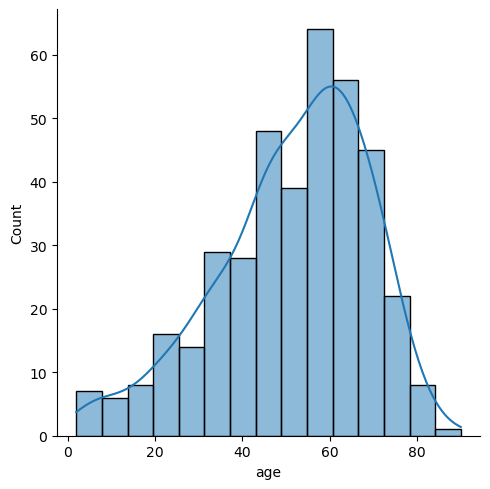

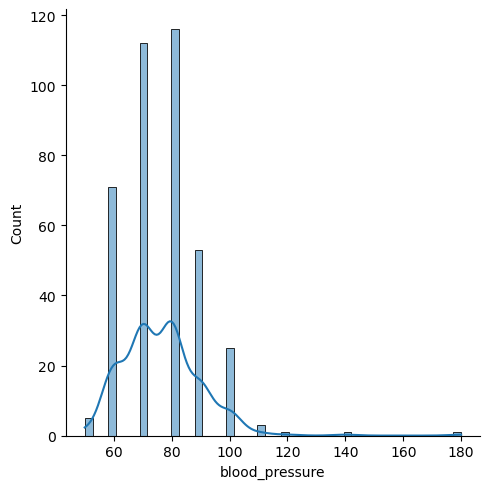

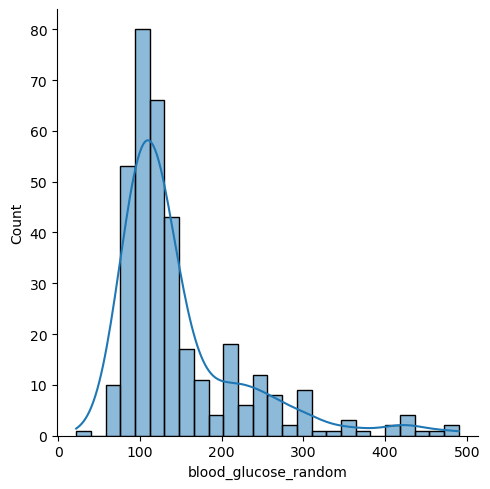

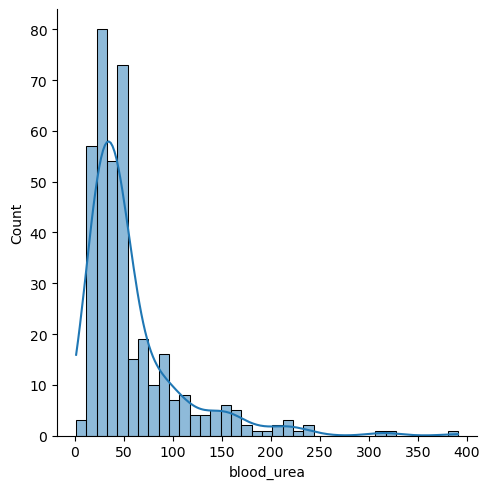

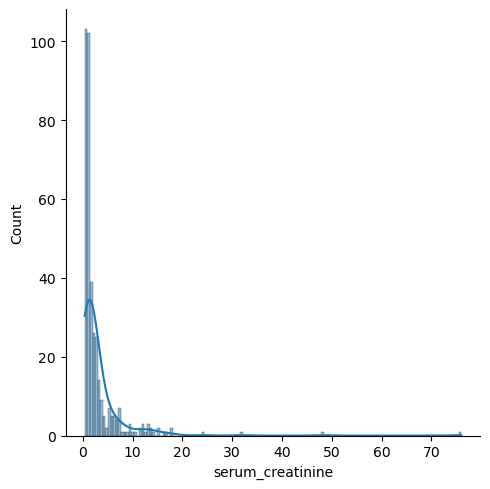

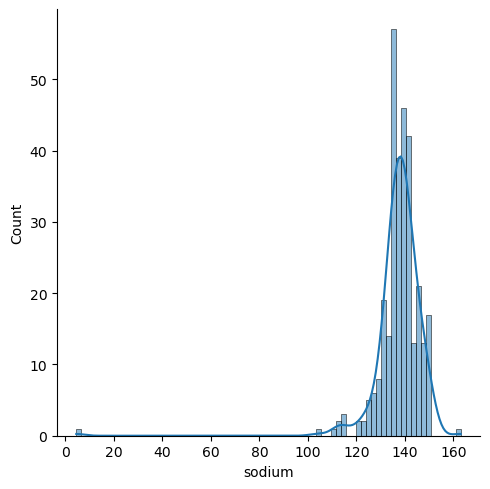

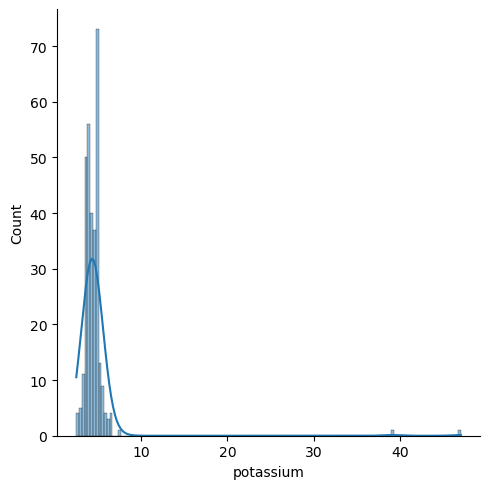

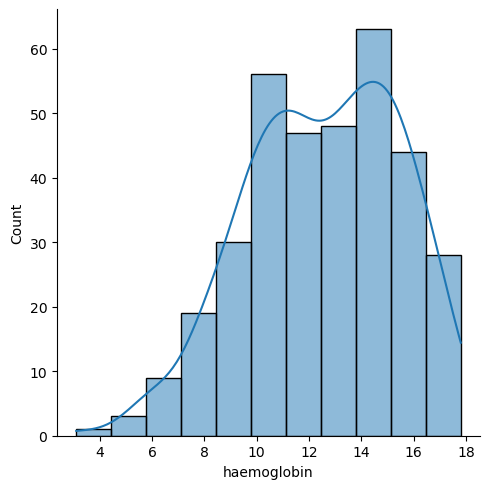

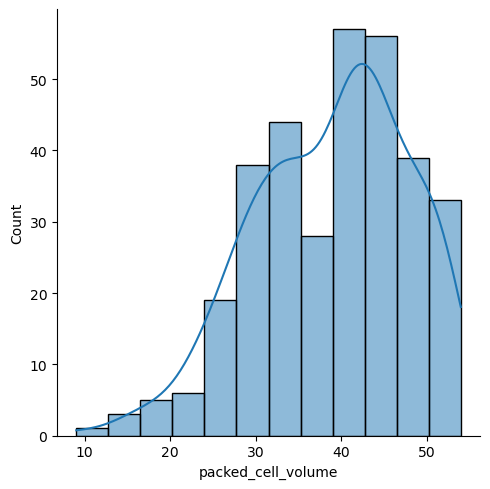

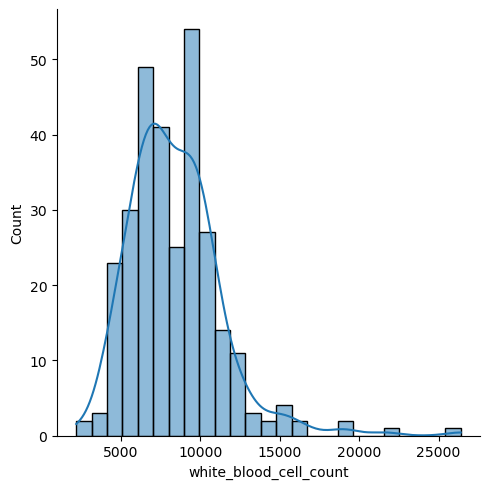

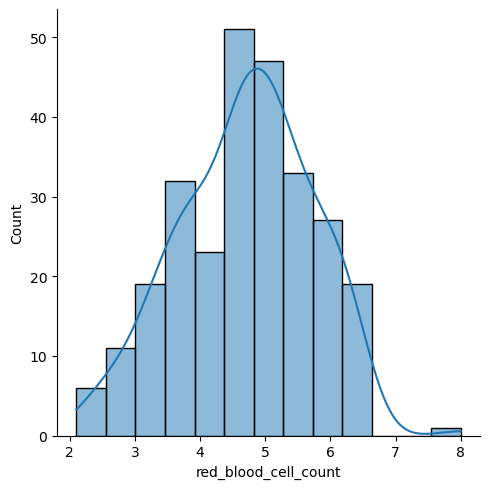

In [189]:
# checking numerical features distribution
plt.figure(figsize=(20,12))
# looping over num cols and checking its distribution
for col in num_cols:
    sns.displot(chronic_df[col], kde=True)

In [190]:
# let's see the cols in cat col list
print(cat_cols)

['specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


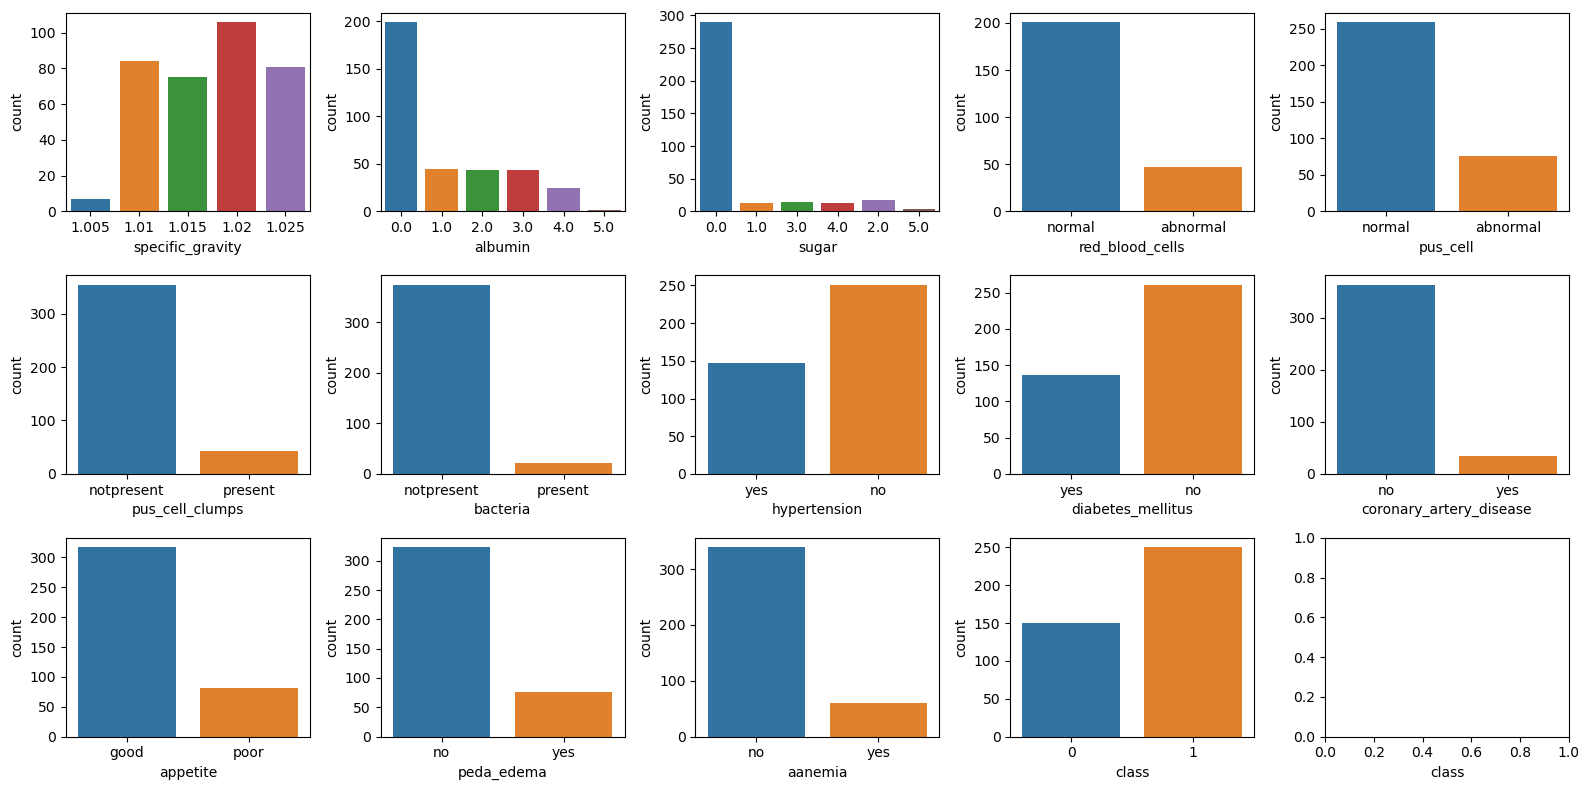

In [191]:
# checking cat features distribution
# create the figure and axes
fig, axes = plt.subplots(3, 5, figsize=(16,8))
axes = axes.ravel()  # flattening the array makes indexing easier
# loop over cat cols and plot countplot
for col,ax in zip(cat_cols, axes):
    sns.countplot(chronic_df[col], x=col, ax=ax)
    plt.xlabel(col)
    fig.tight_layout()

<AxesSubplot:>

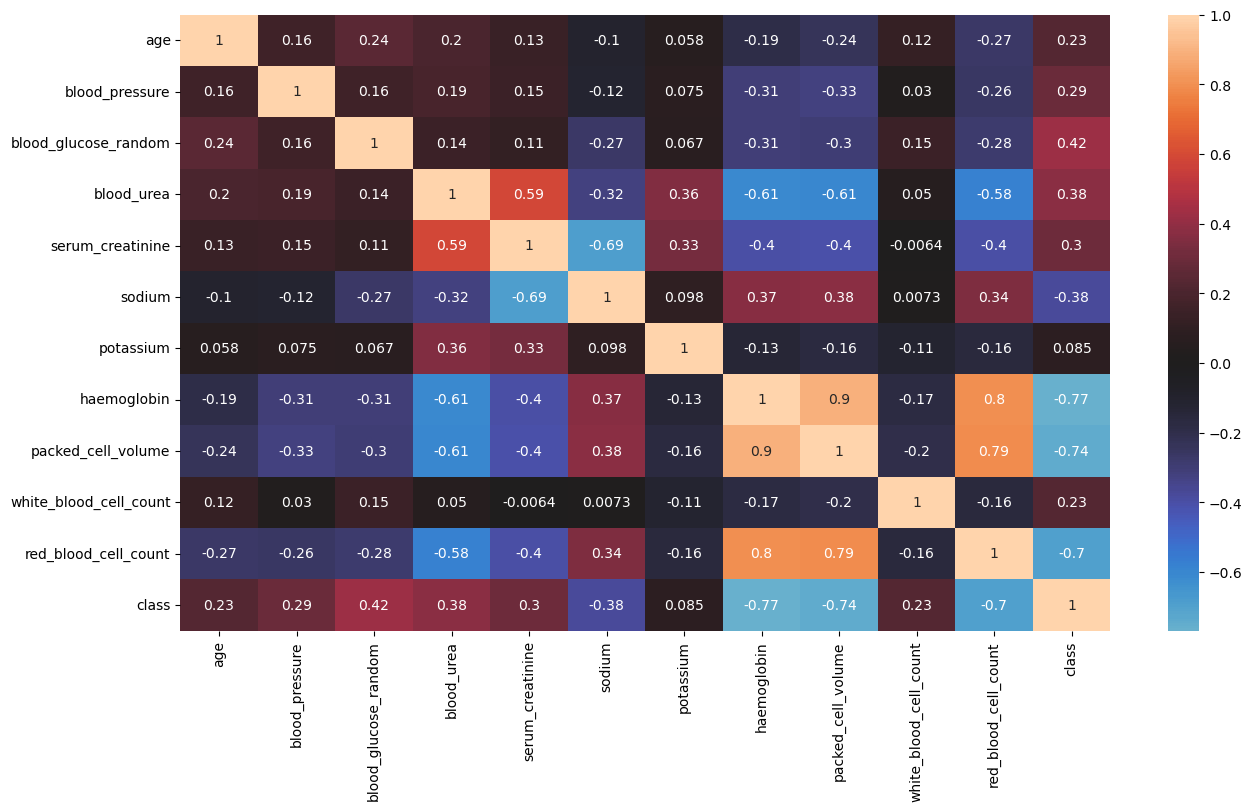

In [192]:
# correlated heatmap of data
plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(), annot=True, center=0)

In [193]:
# let's check count of null values in whole df
chronic_df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [194]:
# let's check count of null values in num_cols
chronic_df[num_cols].isna().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [195]:
# let's check count of null values in cat cols
chronic_df[cat_cols].isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [196]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values
# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [197]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

In [198]:
# let's check count of null values in num_cols again
chronic_df[num_cols].isna().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [199]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [200]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isna().sum().sort_values(ascending=False)

sugar                      49
specific_gravity           47
albumin                    46
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
peda_edema                  1
aanemia                     1
red_blood_cells             0
pus_cell                    0
class                       0
dtype: int64

In [201]:
#filling cat null values with mode
for col in cat_cols:
    impute_mode(col)

In [202]:
# check unique values in each cat col by looping over cat cols
for col in cat_cols:
    print(f'{col} has {chronic_df[col].nunique()} categories\n')

specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [203]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols[3:]:
    chronic_df[col] =le.fit_transform(chronic_df[col])

In [204]:
# check chronic df after transforming cat cols
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,122.0,...,38.0,6000.0,6.1,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,6.0,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [205]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class', axis=1)
y = chronic_df['class']

In [206]:
# splitting data intp training and test set, so import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## **`Model Building`**

Accuracy_score on train data: 0.775
Accuracy_score on test data: 0.5583333333333333
Confusion Matrix: 
[[24 14]
 [39 43]]


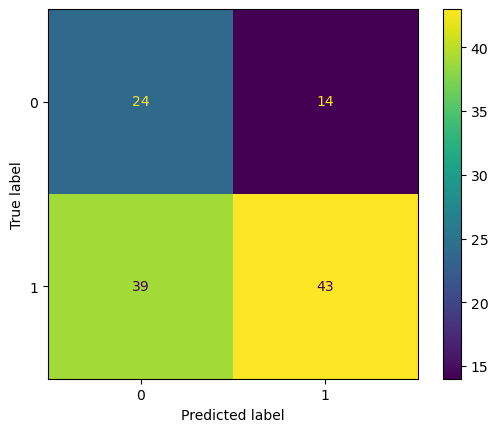

classification_report: 
               precision    recall  f1-score   support

           0       0.38      0.63      0.48        38
           1       0.75      0.52      0.62        82

    accuracy                           0.56       120
   macro avg       0.57      0.58      0.55       120
weighted avg       0.64      0.56      0.57       120



In [301]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn.predict(X_test))
# accuracy score, confusion matrix and classification report of knn
print(f'Accuracy_score on train data: {accuracy_score(y_train, knn.predict(X_train))}')
print(f'Accuracy_score on test data: {accuracy_score(y_test, y_pred)}')
#confusion matrix
from sklearn.metrics import confusion_matrix
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
#classification report
print(f'classification_report: \n {classification_report(y_test, y_pred)}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9416666666666667
Confusion Matrix: 
[[35  3]
 [ 4 78]]


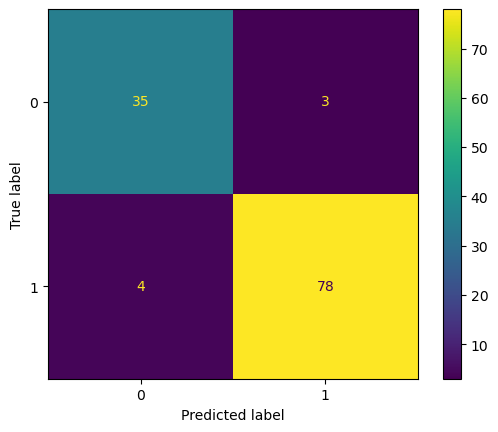

classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.96      0.95      0.96        82

    accuracy                           0.94       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.94      0.94       120



In [286]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, dtc.predict(X_train))}')
print(f'Accuracy_score on test data: {accuracy_score(y_test, y_pred_dtc)}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dtc)}')
cm = confusion_matrix(y_test, y_pred_dtc, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, y_pred_dtc)}')

In [240]:
# hyper parameter tuning of decision tree , import GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_param={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}
# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=grid_param,cv=5, n_jobs=-1, verbose=1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [242]:
# print best parameters and best score in grid search dtc
print(f'Best Parameters: {grid_search_dtc.best_params_}')
print(f'Best Score: {grid_search_dtc.best_score_}')

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
Best Score: 0.9892857142857142


Accuracy_score on train data: 0.9964285714285714
Accuracy_score on test data: 0.95
Confusion Matrix: 
[[35  3]
 [ 3 79]]


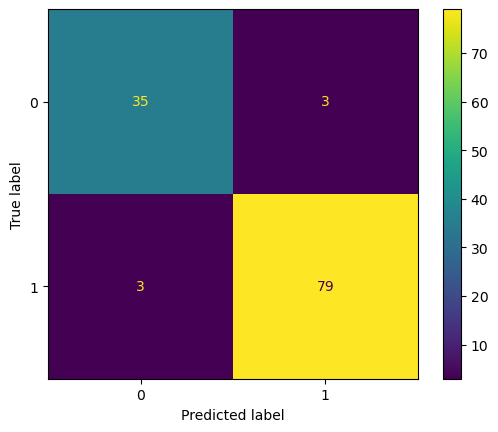

classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        38
           1       0.96      0.96      0.96        82

    accuracy                           0.95       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.95      0.95       120



In [271]:
# storing best estimator
dtc =grid_search_dtc.best_estimator_
# accuracy score, confusion matrix and classification report
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, dtc.predict(X_train))}')
print(f'Accuracy_score on test data: {accuracy_score(y_test, dtc.predict(X_test))}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, dtc.predict(X_test))}')
cm = confusion_matrix(y_test, dtc.predict(X_test), labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, dtc.predict(X_test))}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9833333333333333
Confusion Matrix: 
[[36  2]
 [ 0 82]]


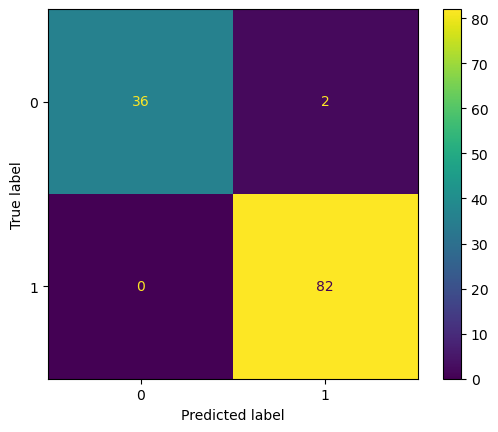

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.98      1.00      0.99        82

    accuracy                           0.98       120
   macro avg       0.99      0.97      0.98       120
weighted avg       0.98      0.98      0.98       120



In [289]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier(criterion='entropy', max_depth=11, max_features='auto', min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rd_clf.fit(X_train, y_train)
rd_clf_pred = rd_clf.predict(X_test)
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, rd_clf.predict(X_train))}')
print(f'Accuracy_score on test data: {accuracy_score(y_test, rd_clf.predict(X_test))}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, rd_clf.predict(X_test))}')
cm = confusion_matrix(y_test, rd_clf.predict(X_test), labels=rd_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rd_clf.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, rd_clf.predict(X_test))}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9833333333333333
Confusion Matrix: 
[[36  2]
 [ 0 82]]


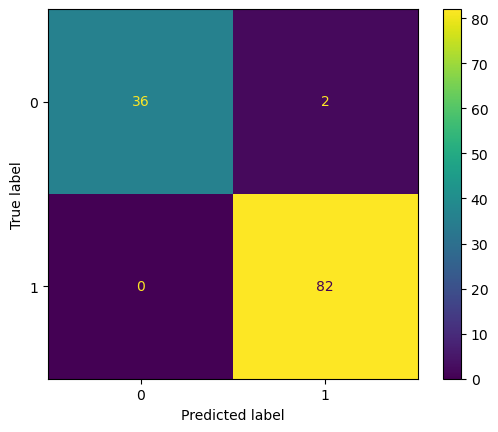

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.98      1.00      0.99        82

    accuracy                           0.98       120
   macro avg       0.99      0.97      0.98       120
weighted avg       0.98      0.98      0.98       120



In [269]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dtc)
ada.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of ada boost
ada_acc = accuracy_score(y_test, ada.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, ada.predict(X_train))}')
print(f'Accuracy_score on test data: {ada_acc}')
# accuracy score, confusion matrix and classification report.
print(f'Confusion Matrix: \n{confusion_matrix(y_test, ada.predict(X_test))}')
cm = confusion_matrix(y_test, ada.predict(X_test), labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, ada.predict(X_test))}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9583333333333334
Confusion Matrix: 
[[35  3]
 [ 2 80]]


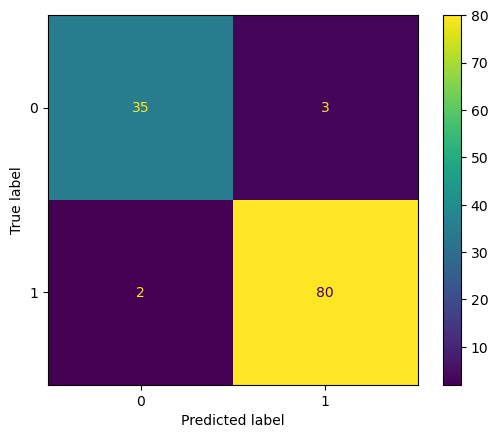

classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.98      0.97        82

    accuracy                           0.96       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [268]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_acc= accuracy_score(y_test, gb.predict(X_test))
# accuracy score, confusion matrix and classification report of gradient boosting classifier
print(f'Accuracy_score on train data: {accuracy_score(y_train, gb.predict(X_train))}')
print(f'Accuracy_score on test data: {gb_acc}')
# accuracy score, confusion matrix and classification report.
print(f'Confusion Matrix: \n{confusion_matrix(y_test, gb.predict(X_test))}')
cm = confusion_matrix(y_test, gb.predict(X_test), labels=gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, gb.predict(X_test))}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9583333333333334
Confusion Matrix: 
[[35  3]
 [ 2 80]]


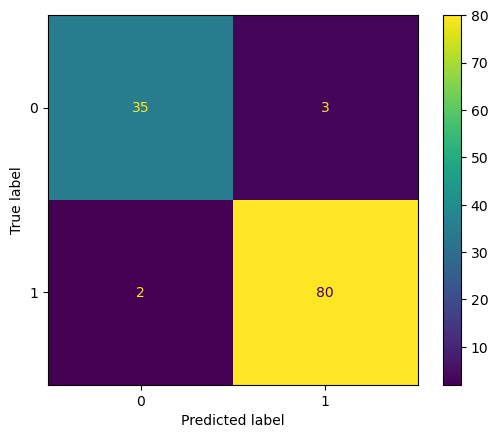

classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.96      0.98      0.97        82

    accuracy                           0.96       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [267]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
sgb = GradientBoostingClassifier(max_depth=4, subsample=0.90, max_features=0.75, n_estimators=200)
sgb.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier
sgb_acc = accuracy_score(y_test, gb.predict(X_test)) 
print(f'Accuracy_score on train data: {accuracy_score(y_train, sgb.predict(X_train))}')
print(f'Accuracy_score on test data: {sgb_acc}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, sgb.predict(X_test))}')
cm = confusion_matrix(y_test, sgb.predict(X_test), labels=sgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgb.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, sgb.predict(X_test))}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.975
Confusion Matrix: 
[[36  2]
 [ 1 81]]


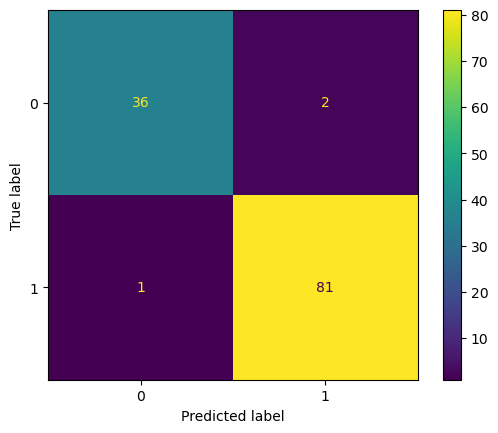

classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.98      0.99      0.98        82

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [266]:
# import XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=5, n_estimators=150)
xgb.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of xgboost
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, xgb.predict(X_train))}')
print(f'Accuracy_score on test data: {xgb_acc}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, xgb.predict(X_test))}')
cm = confusion_matrix(y_test, xgb.predict(X_test), labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, xgb.predict(X_test))}')

In [273]:
pip install catboost


     -------------------------------------- 101.0/101.0 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00


Learning rate set to 0.408198
0:	learn: 0.2221796	total: 123ms	remaining: 1.11s
1:	learn: 0.1356603	total: 129ms	remaining: 514ms
2:	learn: 0.0780075	total: 133ms	remaining: 310ms
3:	learn: 0.0546091	total: 136ms	remaining: 204ms
4:	learn: 0.0367540	total: 139ms	remaining: 139ms
5:	learn: 0.0251109	total: 141ms	remaining: 93.8ms
6:	learn: 0.0217321	total: 142ms	remaining: 61ms
7:	learn: 0.0184701	total: 144ms	remaining: 36ms
8:	learn: 0.0163191	total: 146ms	remaining: 16.2ms
9:	learn: 0.0136345	total: 147ms	remaining: 0us
Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9666666666666667
Confusion Matrix: 
[[36  2]
 [ 2 80]]


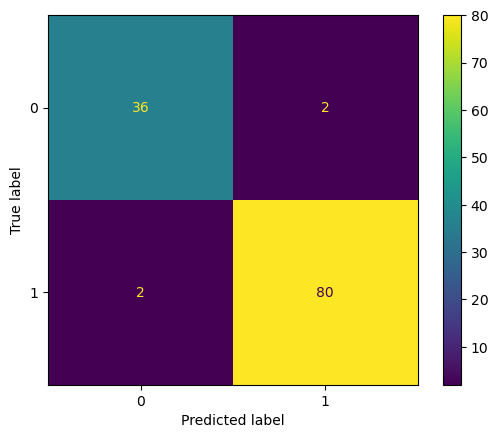

classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.98      0.98      0.98        82

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [275]:
# import CatBoostClassifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of cat boost
cat_acc = accuracy_score(y_test, cat.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, cat.predict(X_train))}')
print(f'Accuracy_score on test data: {cat_acc}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, cat.predict(X_test))}')
cm = confusion_matrix(y_test, cat.predict(X_test), labels=cat.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, cat.predict(X_test))}')

Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9666666666666667
Confusion Matrix: 
[[36  2]
 [ 2 80]]


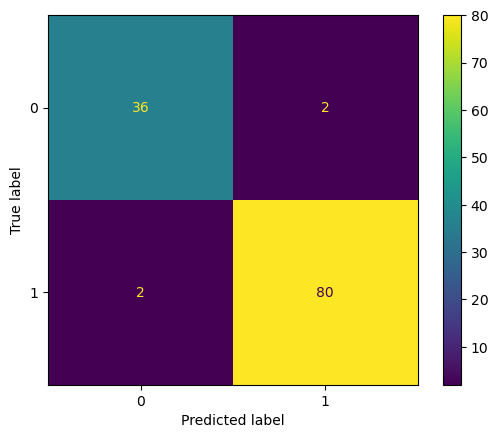

classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.98      0.98      0.98        82

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [276]:
# import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of extra trees classifier
etc_acc = accuracy_score(y_test, etc.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, etc.predict(X_train))}')
print(f'Accuracy_score on test data: {etc_acc}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, etc.predict(X_test))}')
cm = confusion_matrix(y_test, etc.predict(X_test), labels=etc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etc.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, etc.predict(X_test))}')

In [279]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Accuracy_score on train data: 1.0
Accuracy_score on test data: 0.9833333333333333
Confusion Matrix: 
[[36  2]
 [ 0 82]]


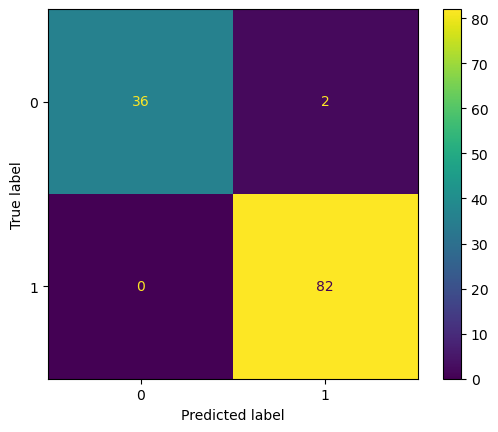

classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.98      1.00      0.99        82

    accuracy                           0.98       120
   macro avg       0.99      0.97      0.98       120
weighted avg       0.98      0.98      0.98       120



In [280]:
# import LGBMClassifier
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(learning_rate=1)
lgbm.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of lgbm classifier
lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))
print(f'Accuracy_score on train data: {accuracy_score(y_train, lgbm.predict(X_train))}')
print(f'Accuracy_score on test data: {lgbm_acc}')
# accuracy score, confusion matrix and classification report
print(f'Confusion Matrix: \n{confusion_matrix(y_test, lgbm.predict(X_test))}')
cm = confusion_matrix(y_test, lgbm.predict(X_test), labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()
plt.show()
print(f'classification_report: \n {classification_report(y_test, lgbm.predict(X_test))}')

In [302]:
# comparing all models accuracy by creating a df
models = pd.DataFrame({
    'Model': ['KNN', 'DecissionTreeClassifier', 'Random Forest Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'xgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score': [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, xgb_acc, cat_acc, etc_acc]
})

In [303]:
print(models.sort_values(by='Score',ascending=False))

                          Model     Score
2      Random Forest Classifier  0.983333
3          Ada Boost Classifier  0.983333
5                       xgBoost  0.975000
6                     Cat Boost  0.966667
7        Extra Trees Classifier  0.966667
4  Gradient Boosting Classifier  0.958333
1       DecissionTreeClassifier  0.941667
0                           KNN  0.558333
